<a href="https://colab.research.google.com/github/edieski/tags_suggestions_for_stackoverflow/blob/main/Data_exploration_and_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
data = pd.read_csv(r'drive/MyDrive/stack_overflow_NLP/QueryResults.csv')

In [ ]:
data.head(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Can I force JAXB not to convert "" into &quot;,...",<p>I have an Object that is being marshalled t...,<java><jaxb><xml-serialization><marshalling><h...,1506663,26,67176,0.0,14
1,On Performance and Java Interoperability: Cloj...,<p>I have already read various accounts of Clo...,<java><performance><scala><clojure><jvm>,1506728,82,31652,0.0,8
2,How to map Ctrl+A and Ctrl+Shift+A differently?,"<p>In a terminal, one cannot distinguish <kbd>...",<vim><key-bindings>,1506764,108,61206,0.0,7
3,UIButton default tap fade animation missing in...,<p>I have a custom cell with a few UIButtons i...,<ios><iphone><objective-c><uitableview><uibutton>,20489416,15,12756,0.0,6
4,How to run a single test from a Rails test suite?,<p>How can I run a single test from a Rails te...,<ruby-on-rails><unit-testing><rake>,1506780,166,110439,0.0,14
5,Reverse integer digits,<p>I was trying to reverse the digits of an in...,<ruby>,20489436,7,11177,NaN,7
6,What can human beings make out of the restrict...,<p>If I got the C99 <code>restrict</code> keyw...,<c><c99><keyword><restrict-qualifier>,1506794,16,2753,0.0,6
7,Why is 'Simulate Background Fetch' leading to ...,"<p>I'm on macOS Sierra, Xcode 8, and get crash...",<ios><xcode8>,39623664,28,5781,0.0,6
8,What reasons are there to prefer glob over rea...,"<p>This question is a spin-off from <a href=""h...",<perl><glob><readdir>,1506801,63,12861,0.0,10
9,How can I use just one boost library/file?,<blockquote>\n <p><strong>Possible Duplicate:...,<c++><visual-studio><boost>,1507026,13,9108,0.0,6


In [4]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# apply the function to multiple columns
data['Body'] = data['Body'].apply(remove_html_tags)
data['Title'] = data['Title'].apply(remove_html_tags)


data.head(10)

<ipython-input-4-b24b5ed2c914>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Can I force JAXB not to convert "" into "", for ...",I have an Object that is being marshalled to X...,<java><jaxb><xml-serialization><marshalling><h...,1506663,26,67176,0.0,14
1,On Performance and Java Interoperability: Cloj...,I have already read various accounts of Clojur...,<java><performance><scala><clojure><jvm>,1506728,82,31652,0.0,8
2,How to map Ctrl+A and Ctrl+Shift+A differently?,"In a terminal, one cannot distinguish Ctrl+A a...",<vim><key-bindings>,1506764,108,61206,0.0,7
3,UIButton default tap fade animation missing in...,I have a custom cell with a few UIButtons in i...,<ios><iphone><objective-c><uitableview><uibutton>,20489416,15,12756,0.0,6
4,How to run a single test from a Rails test suite?,How can I run a single test from a Rails test ...,<ruby-on-rails><unit-testing><rake>,1506780,166,110439,0.0,14
5,Reverse integer digits,I was trying to reverse the digits of an integ...,<ruby>,20489436,7,11177,NaN,7
6,What can human beings make out of the restrict...,"If I got the C99 restrict keyword right, quali...",<c><c99><keyword><restrict-qualifier>,1506794,16,2753,0.0,6
7,Why is 'Simulate Background Fetch' leading to ...,"I'm on macOS Sierra, Xcode 8, and get crashes ...",<ios><xcode8>,39623664,28,5781,0.0,6
8,What reasons are there to prefer glob over rea...,This question is a spin-off from this one. Som...,<perl><glob><readdir>,1506801,63,12861,0.0,10
9,How can I use just one boost library/file?,\nPossible Duplicate:\nBuilding a subset of bo...,<c++><visual-studio><boost>,1507026,13,9108,0.0,6


In [5]:
from nltk.corpus import stopwords
import nltk

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

def tokenizer_fct(sentence):
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    return word_tokenize(sentence_clean)

def preprocess_text(list_words):
    lw = [w.lower() for w in list_words if not (w.startswith("@") or w.startswith("http"))]
    return [w for w in lw if w not in stop_words and len(w) > 2]

def lemmatize_words(list_words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in list_words]

def transform_text(desc_text, lemmatize=False):
    word_tokens = tokenizer_fct(desc_text)
    processed_words = preprocess_text(word_tokens)
    if lemmatize:
        processed_words = lemmatize_words(processed_words)
    return ' '.join(processed_words)

data['body_sentence_bow'] = data['Body'].apply(transform_text)
data['body_sentence_bow_lem'] = data['Body'].apply(lambda x: transform_text(x, lemmatize=True))
data['body_sentence_dl'] = data['Body'].apply(transform_text)
data.shape



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


(50000, 11)

In [6]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,body_sentence_bow,body_sentence_bow_lem,body_sentence_dl
0,"Can I force JAXB not to convert "" into "", for ...",I have an Object that is being marshalled to X...,<java><jaxb><xml-serialization><marshalling><h...,1506663,26,67176,0.0,14,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...
1,On Performance and Java Interoperability: Cloj...,I have already read various accounts of Clojur...,<java><performance><scala><clojure><jvm>,1506728,82,31652,0.0,8,already read various accounts clojure vs. scal...,already read various account clojure vs. scala...,already read various accounts clojure vs. scal...
2,How to map Ctrl+A and Ctrl+Shift+A differently?,"In a terminal, one cannot distinguish Ctrl+A a...",<vim><key-bindings>,1506764,108,61206,0.0,7,terminal one distinguish ctrl ctrl shift emit ...,terminal one distinguish ctrl ctrl shift emit ...,terminal one distinguish ctrl ctrl shift emit ...
3,UIButton default tap fade animation missing in...,I have a custom cell with a few UIButtons in i...,<ios><iphone><objective-c><uitableview><uibutton>,20489416,15,12756,0.0,6,custom cell uibuttons created target actions l...,custom cell uibuttons created target action li...,custom cell uibuttons created target actions l...
4,How to run a single test from a Rails test suite?,How can I run a single test from a Rails test ...,<ruby-on-rails><unit-testing><rake>,1506780,166,110439,0.0,14,run single test rails test suite rake test any...,run single test rail test suite rake test anyt...,run single test rails test suite rake test any...


In [7]:
data['Title_sentence_bow'] = data['Title'].apply(transform_text)
data['Title_sentence_bow_lem'] = data['Title'].apply(lambda x: transform_text(x, lemmatize=True))
data['Title_sentence_dl'] = data['Title'].apply(transform_text)

In [ ]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,body_sentence_bow,body_sentence_bow_lem,body_sentence_dl,Title_sentence_bow,Title_sentence_bow_lem,Title_sentence_dl
0,"Can I force JAXB not to convert "" into &quot;,...",<p>I have an Object that is being marshalled t...,java,1506663,26,67176,0.0,14,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,force jaxb convert quot example marshalling xml,force jaxb convert quot example marshalling xml,force jaxb convert quot example marshalling xml
1,On Performance and Java Interoperability: Cloj...,<p>I have already read various accounts of Clo...,java,1506728,82,31652,0.0,8,already read various accounts clojure vs. scal...,already read various account clojure vs. scala...,already read various accounts clojure vs. scal...,performance java interoperability clojure vs. ...,performance java interoperability clojure vs. ...,performance java interoperability clojure vs. ...
2,How to map Ctrl+A and Ctrl+Shift+A differently?,"<p>In a terminal, one cannot distinguish <kbd>...",vim,1506764,108,61206,0.0,7,terminal one distinguish kbd ctrl kbd kbd kbd ...,terminal one distinguish kbd ctrl kbd kbd kbd ...,terminal one distinguish kbd ctrl kbd kbd kbd ...,map ctrl ctrl shift differently,map ctrl ctrl shift differently,map ctrl ctrl shift differently
3,UIButton default tap fade animation missing in...,<p>I have a custom cell with a few UIButtons i...,ios,20489416,15,12756,0.0,6,custom cell uibuttons created target actions l...,custom cell uibuttons created target action li...,custom cell uibuttons created target actions l...,uibutton default tap fade animation missing ui...,uibutton default tap fade animation missing ui...,uibutton default tap fade animation missing ui...
4,How to run a single test from a Rails test suite?,<p>How can I run a single test from a Rails te...,ruby-on-rails,1506780,166,110439,0.0,14,run single test rails test suite code rake tes...,run single test rail test suite code rake test...,run single test rails test suite code rake tes...,run single test rails test suite,run single test rail test suite,run single test rails test suite


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer




# initialize CountVectorizer with desired ngram range
ngram_range = (2,2) # set ngram range to only include bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range)

# fit_transform the text data
X = vectorizer.fit_transform(data['Title_sentence_bow_lem'])

# create a dataframe of ngram counts
df_ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# print top bigrams
print("\nTop bigrams:\n", df_ngrams.sum().sort_values(ascending=False).head(10))
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues', random_state=42)

# generate word cloud from trigram counts
wordcloud.generate_from_frequencies(df_ngrams.sum().to_dict())

# plot the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


KeyboardInterrupt: ignored

In [ ]:
ngram_range = (3,3) # set ngram range to only include trigrams
vectorizer = CountVectorizer(ngram_range=ngram_range)

# fit_transform the text data
X = vectorizer.fit_transform(data['body_sentence_bow_lem'])

# create a dataframe of ngram counts
df_ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# print top trigrams
print("\nTop trigrams:\n", df_ngrams.sum().sort_values(ascending=False).head(10))



Top trigrams:
 system out println            907
override public void          596
public static void            516
get set public                481
static void main              472
void main string              425
main string args              419
android app activitythread    413
lib site packages             412
asp net mvc                   410
dtype: int64


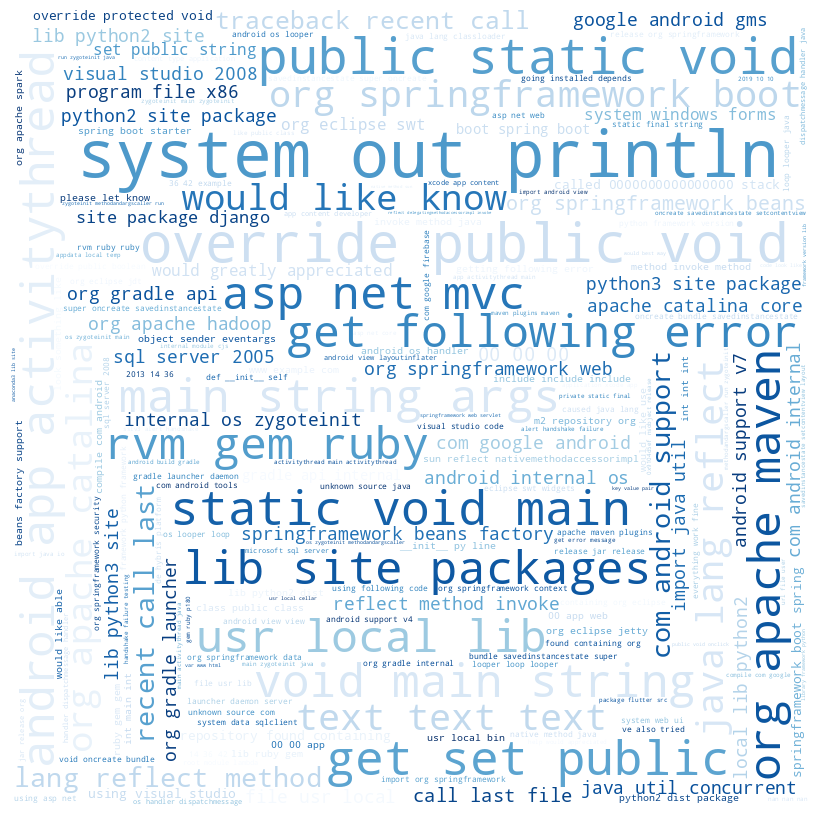

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues', random_state=42)

# generate word cloud from trigram counts
wordcloud.generate_from_frequencies(df_ngrams.sum().to_dict())

# plot the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Top unigrams:
 file      3001
using     2633
java      2277
string    1936
use       1917
get       1868
net       1758
python    1739
way       1712
error     1670
dtype: int64


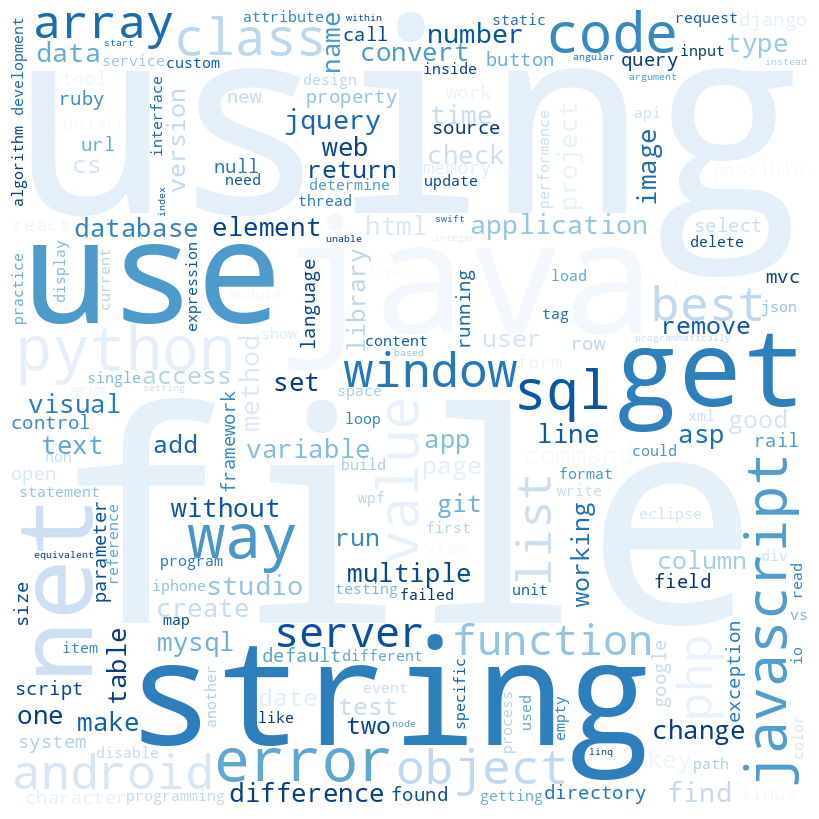

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# initialize CountVectorizer with desired ngram range
ngram_range = (1,1) # set ngram range to only include bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range)

# fit_transform the text data
X = vectorizer.fit_transform(data['Title_sentence_bow_lem'])

# create a dataframe of ngram counts
df_ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# print top bigrams
print("\nTop unigrams:\n", df_ngrams.sum().sort_values(ascending=False).head(10))
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues', random_state=42)

# generate word cloud from trigram counts
wordcloud.generate_from_frequencies(df_ngrams.sum().to_dict())

# plot the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


looking at the tags

In [8]:
def remove_angle_brackets(text):
    return text.replace("<", "").replace(">", " ").replace('/n', "")

def keep_first_tag(text):
    tags = text.split()
    if tags:
        return tags[0]
    else:
        return ""

data['Tags'] = data['Tags'].apply(remove_angle_brackets).apply(keep_first_tag)
data.head(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,body_sentence_bow,body_sentence_bow_lem,body_sentence_dl,Title_sentence_bow,Title_sentence_bow_lem,Title_sentence_dl
0,"Can I force JAXB not to convert "" into "", for ...",I have an Object that is being marshalled to X...,java,1506663,26,67176,0.0,14,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,force jaxb convert example marshalling xml,force jaxb convert example marshalling xml,force jaxb convert example marshalling xml
1,On Performance and Java Interoperability: Cloj...,I have already read various accounts of Clojur...,java,1506728,82,31652,0.0,8,already read various accounts clojure vs. scal...,already read various account clojure vs. scala...,already read various accounts clojure vs. scal...,performance java interoperability clojure vs. ...,performance java interoperability clojure vs. ...,performance java interoperability clojure vs. ...
2,How to map Ctrl+A and Ctrl+Shift+A differently?,"In a terminal, one cannot distinguish Ctrl+A a...",vim,1506764,108,61206,0.0,7,terminal one distinguish ctrl ctrl shift emit ...,terminal one distinguish ctrl ctrl shift emit ...,terminal one distinguish ctrl ctrl shift emit ...,map ctrl ctrl shift differently,map ctrl ctrl shift differently,map ctrl ctrl shift differently
3,UIButton default tap fade animation missing in...,I have a custom cell with a few UIButtons in i...,ios,20489416,15,12756,0.0,6,custom cell uibuttons created target actions l...,custom cell uibuttons created target action li...,custom cell uibuttons created target actions l...,uibutton default tap fade animation missing ui...,uibutton default tap fade animation missing ui...,uibutton default tap fade animation missing ui...
4,How to run a single test from a Rails test suite?,How can I run a single test from a Rails test ...,ruby-on-rails,1506780,166,110439,0.0,14,run single test rails test suite rake test any...,run single test rail test suite rake test anyt...,run single test rails test suite rake test any...,run single test rails test suite,run single test rail test suite,run single test rails test suite
5,Reverse integer digits,I was trying to reverse the digits of an integ...,ruby,20489436,7,11177,NaN,7,trying reverse digits integer 123456 654321 be...,trying reverse digit integer 123456 654321 bes...,trying reverse digits integer 123456 654321 be...,reverse integer digits,reverse integer digit,reverse integer digits
6,What can human beings make out of the restrict...,"If I got the C99 restrict keyword right, quali...",c,1506794,16,2753,0.0,6,got c99 restrict keyword right qualifying poin...,got c99 restrict keyword right qualifying poin...,got c99 restrict keyword right qualifying poin...,human beings make restrict qualifier,human being make restrict qualifier,human beings make restrict qualifier
7,Why is 'Simulate Background Fetch' leading to ...,"I'm on macOS Sierra, Xcode 8, and get crashes ...",ios,39623664,28,5781,0.0,6,macos sierra xcode get crashes whenever try si...,macos sierra xcode get crash whenever try simu...,macos sierra xcode get crashes whenever try si...,'simulate background fetch leading crash libsy...,'simulate background fetch leading crash libsy...,'simulate background fetch leading crash libsy...
8,What reasons are there to prefer glob over rea...,This question is a spin-off from this one. Som...,perl,1506801,63,12861,0.0,10,question spin one history first learned perl p...,question spin one history first learned perl p...,question spin one history first learned perl p...,reasons prefer glob readdir vice versa perl,reason prefer glob readdir vice versa perl,reasons prefer glob readdir vice versa perl
9,How can I use just one boost library/file?,\nPossible Duplicate:\nBuilding a subset of bo...,c++,1507026,13,9108,0.0,6,possible duplicate building subset boost windo...,possible duplicate building subset boost windo...,possible

In [10]:
tag_freq = data['Tags'].value_counts()


# Get top 10 most frequent tags
top_tags = tag_freq[:7]

# Print the top 10 tags
print(top_tags)

c#            5454
java          4631
javascript    3822
python        3448
c++           2789
php           2181
android       1806
Name: Tags, dtype: int64


In [11]:
top_tags = data['Tags'].value_counts().head(7).index.tolist()
data_top_tags = data[data['Tags'].isin(top_tags)]
data_top_tags.head()



,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,body_sentence_bow,body_sentence_bow_lem,body_sentence_dl,Title_sentence_bow,Title_sentence_bow_lem,Title_sentence_dl
0,"Can I force JAXB not to convert "" into "", for ...",I have an Object that is being marshalled to X...,java,1506663,26,67176,0.0,14,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,object marshalled xml using jaxb one element c...,force jaxb convert example marshalling xml,force jaxb convert example marshalling xml,force jaxb convert example marshalling xml
1,On Performance and Java Interoperability: Cloj...,I have already read various accounts of Clojur...,java,1506728,82,31652,0.0,8,already read various accounts clojure vs. scal...,already read various account clojure vs. scala...,already read various accounts clojure vs. scal...,performance java interoperability clojure vs. ...,performance java interoperability clojure vs. ...,performance java interoperability clojure vs. ...
9,How can I use just one boost library/file?,\nPossible Duplicate:\nBuilding a subset of bo...,c++,1507026,13,9108,0.0,6,possible duplicate building subset boost windo...,possible duplicate building subset boost windo...,possible duplicate building subset boost windo...,use one boost library file,use one boost library file,use one boost library file
10,How do I get fluent in Python?,Once you have learned the basic commands in Py...,python,1507041,11,14655,0.0,8,learned basic commands python often able solve...,learned basic command python often able solve ...,learned basic commands python often able solve...,get fluent python,get fluent python,get fluent python
11,Python: Is it bad form to raise exceptions wit...,Is it considered bad form to raise exceptions ...,python,1507082,162,74623,0.0,7,considered bad form raise exceptions within __...,considered bad form raise exception within __i...,considered bad form raise exceptions within __...,python bad form raise exceptions within __init__,python bad form raise exception within __init__,python bad form raise exceptions within __init__


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for tag in top_tags:
    # filter the data by tag
    filtered_data = data[data['Tags'] == tag]
    ngram_range = (1,1) # set ngram range to only include bigrams
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    # fit_transform the text data
    X = vectorizer.fit_transform(filtered_data['body_sentence_bow_lem'])

    # create a dataframe of ngram counts
    df_ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # print top bigrams
    print("\nTop unigrams:\n", df_ngrams.sum().sort_values(ascending=False).head(10))
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues', random_state=42)

    # generate word cloud from trigram counts
    wordcloud.generate_from_frequencies(df_ngrams.sum().to_dict())

    # plot the word cloud
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title("Wordcloud for{}".format(tag))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


NameError: ignored

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pink_color_map = 'Pastel1'

for tag in top_tags:
    # filter the data by tag
    filtered_data = data[data['Tags'] == tag]

    # combine the text data for the tag into a single string
    text = ' '.join(filtered_data['Title_sentence_bow_lem'])

    # generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap=pink_color_map).generate(text)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(tag.capitalize() + ' Word Cloud', fontsize=16)
    plt.show()


In [ ]:
data_top_tags.head()

#Topic modeling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


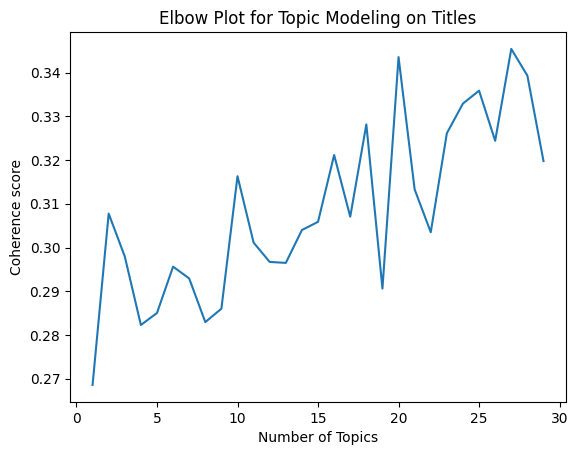

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

# Tokenize the text and create a dictionary
title_docs = [doc.split() for doc in data_top_tags['Title']]
title_dictionary = Dictionary(title_docs)

# Convert the documents into bag of words format
title_corpus = [title_dictionary.doc2bow(doc) for doc in title_docs]

# Compute the coherence scores for different number of topics
coherence_scores = []
for num_topics in range(1, 30 ):
    lda_model = LdaModel(title_corpus, num_topics=num_topics, id2word=title_dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=title_docs, dictionary=title_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Plot the coherence scores
x = np.arange(1, 30)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Elbow Plot for Topic Modeling on Titles")
plt.show()


In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Prepare data
data_top_tags.dropna(subset=['Title', 'Body'], inplace=True) # Drop rows with missing values in Title or Body
documents = data['Title'].tolist() + data['Body'].tolist() # Combine the Title and Body columns into one list

# Preprocess text
stoplist = set(gensim.parsing.preprocessing.STOPWORDS)
texts = [[word for word in gensim.utils.simple_preprocess(document) if word not in stoplist] for document in documents]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
num_topics = 21 # Choose the number of topics to generate
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(topic)

(0, '0.079*"user" + 0.063*"object" + 0.034*"solution" + 0.033*"override" + 0.031*"right" + 0.031*"index" + 0.028*"https" + 0.028*"check" + 0.025*"element" + 0.025*"way"')
(1, '0.148*"class" + 0.139*"com" + 0.062*"method" + 0.057*"js" + 0.046*"view" + 0.038*"run" + 0.035*"static" + 0.028*"want" + 0.019*"called" + 0.018*"final"')
(2, '0.127*"error" + 0.060*"code" + 0.043*"firebase" + 0.041*"program" + 0.040*"time" + 0.040*"json" + 0.039*"const" + 0.038*"local" + 0.031*"classes" + 0.027*"work"')
(3, '0.120*"test" + 0.060*"result" + 0.037*"event" + 0.031*"wrong" + 0.030*"configuration" + 0.030*"click" + 0.026*"given" + 0.023*"similar" + 0.022*"specific" + 0.022*"close"')
(4, '0.153*"file" + 0.064*"void" + 0.062*"set" + 0.042*"files" + 0.041*"private" + 0.031*"read" + 0.026*"help" + 0.026*"image" + 0.025*"config" + 0.023*"default"')
(5, '0.140*"app" + 0.071*"version" + 0.066*"build" + 0.044*"gradle" + 0.041*"message" + 0.033*"content" + 0.031*"able" + 0.031*"home" + 0.025*"apache" + 0.023*"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Prepare data
data_top_tags.dropna(subset=['Title', 'Body'], inplace=True) # Drop rows with missing values in Title or Body
documents = data['Title'].tolist() + data['Body'].tolist() # Combine the Title and Body columns into one list

# Preprocess text
stoplist = set(gensim.parsing.preprocessing.STOPWORDS)
texts = [[word for word in gensim.utils.simple_preprocess(document) if word not in stoplist] for document in documents]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
num_topics = 10 # Choose the number of topics to generate
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(topic)

(0, '0.050*"python" + 0.032*"project" + 0.027*"module" + 0.024*"version" + 0.018*"firebase" + 0.014*"install" + 0.014*"run" + 0.013*"problem" + 0.013*"library" + 0.012*"intent"')
(1, '0.102*"java" + 0.070*"class" + 0.057*"public" + 0.024*"method" + 0.020*"users" + 0.016*"main" + 0.014*"item" + 0.013*"static" + 0.013*"http" + 0.011*"index"')
(2, '0.027*"return" + 0.023*"like" + 0.023*"value" + 0.022*"new" + 0.020*"function" + 0.018*"code" + 0.018*"use" + 0.017*"want" + 0.015*"void" + 0.014*"object"')
(3, '0.056*"string" + 0.052*"int" + 0.035*"list" + 0.028*"array" + 0.018*"text" + 0.015*"type" + 0.015*"script" + 0.012*"know" + 0.012*"print" + 0.011*"src"')
(4, '0.068*"com" + 0.056*"id" + 0.032*"true" + 0.024*"user" + 0.019*"input" + 0.018*"php" + 0.018*"false" + 0.018*"tried" + 0.014*"date" + 0.014*"url"')
(5, '0.036*"build" + 0.030*"self" + 0.024*"gradle" + 0.023*"result" + 0.022*"solution" + 0.015*"compile" + 0.015*"model" + 0.014*"plugin" + 0.014*"maven" + 0.012*"core"')
(6, '0.022*"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Feature extraction

In [12]:
data_top_tags = data_top_tags.dropna()
data_top_tags.shape
data_top_tags['Tags'].unique()


array(['java', 'c++', 'python', 'javascript', 'c#', 'php', 'android'],
      dtype=object)

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Encode 'tag' labels to numerical values
label_encoder = LabelEncoder()
data_top_tags['tag_encoded'] = label_encoder.fit_transform(data_top_tags['Tags'])

# Vectorize the 'title' and 'body' separately using both CountVectorizer and TF-IDF
max_features = 10000

# Initialize CountVectorizer and TF-IDF vectorizers with max_features
count_vectorizer = CountVectorizer(max_features=max_features)
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

data_top_tags['combined_text'] = [f"{title} {body}" for title, body in zip(data_top_tags['Title_sentence_bow_lem'], data_top_tags['body_sentence_bow_lem'])]



# Fit and transform the combined_text using TF-IDF vectorizer
tfidf_features_combined = tfidf_vectorizer.fit_transform(data_top_tags['combined_text'])


# Fit and transform the combined_text using CountVectorizer
bow_features_combined = count_vectorizer.fit_transform(data_top_tags['combined_text'])


In [34]:
tfidf = pd.DataFrame(tfidf_features_combined)
bow = pd.DataFrame(bow_features_combined)

In [51]:
tfidf.to_csv('drive/MyDrive/stack_overflow_NLP/tfidf.csv',index =  False)
bow.to_csv('drive/MyDrive/stack_overflow_NLP/bow.csv', index = False)
tag_label_df.to_csv('drive/MyDrive/stack_overflow_NLP/label_df.csv', index = False)



In [32]:
tag_label_df = pd.DataFrame({'tag': label_encoder.classes_, 'tag_encoded': label_encoder.transform(label_encoder.classes_)})

# Display the DataFrame with tag-label mapping
print(tag_label_df)

          tag  tag_encoded
0     android            0
1          c#            1
2         c++            2
3        java            3
4  javascript            4
5         php            5
6      python            6


In [37]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

In [38]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


# Combine 'title' and 'body' into a single text representation
data_top_tags['combined_text'] = [f"{title} {body}" for title, body in zip(data_top_tags['Title_sentence_bow_lem'], data_top_tags['body_sentence_bow_lem'])]

# Preprocess the data into a list of tokenized sentences
sentences = [text.split() for text in data_top_tags['combined_text']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Function to extract Word2Vec embeddings for a given text
def get_word2vec_embeddings(text, model):
    embeddings = []
    for word in text.split():
        if word in model.wv:
            embeddings.append(model.wv[word])
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# Extract Word2Vec embeddings for 'body' and 'title'
data_top_tags['body_word2vec'] = [get_word2vec_embeddings(body, model) for body in data_top_tags['body_sentence_bow_lem']]
data_top_tags['title_word2vec'] = [get_word2vec_embeddings(title, model) for title in data_top_tags['Title_sentence_bow_lem']]


In [48]:
data_top_tags['title_word2vec'][1].shape

(100,)

In [52]:
data_top_tags.to_csv('drive/MyDrive/stack_overflow_NLP/data_with_word2vec.csv', index = False)